In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\muska\Desktop\Python Project')  # Replace with your actual path
print("Your current working directory is:", os.getcwd())

Your current working directory is: C:\Users\muska\Desktop\Python Project


In [7]:
df=pd.read_csv('Customer Churn.csv')
df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#replacing blanks with 0 as tenure is zero

In [8]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df. duplicated().sum()

np.int64(0)

In [13]:
#checking duplicates based on the unique value in the data

In [14]:
df["customerID"].duplicated().sum()

np.int64(0)

#Converting 0 and 1 values of Senior citizens to No/Yes to make it easier to understand

In [15]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [16]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#Starting analysis

<function matplotlib.pyplot.show(close=None, block=None)>

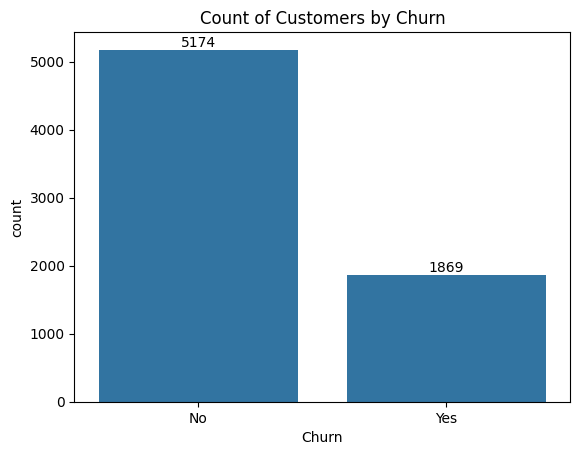

In [17]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

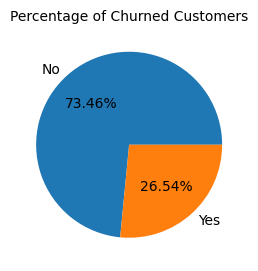

In [18]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show

#from the given pie chart we can conlude that 26.54% of our customers have churned out
#not let's explore the reason behind it

<function matplotlib.pyplot.show(close=None, block=None)>

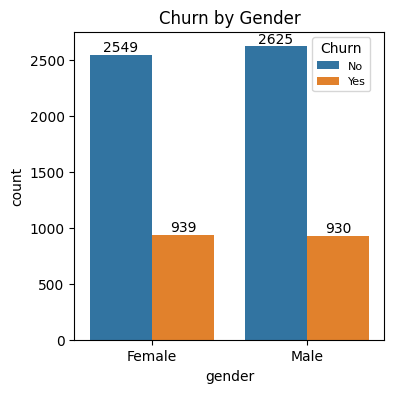

In [19]:
plt.figure(figsize=(4,4))
ax1=sns.countplot(x="gender",data=df, hue="Churn")
for container in ax1.containers:
    ax1.bar_label(container)
plt.title("Churn by Gender")
plt.legend(title='Churn', loc='upper left', bbox_to_anchor=(0.75,1), ncol=1, fontsize=8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

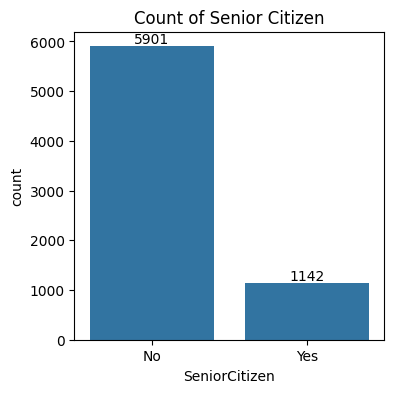

In [20]:
plt.figure(figsize=(4,4))
ax1=sns.countplot(x="SeniorCitizen",data=df)
for container in ax1.containers:
    ax1.bar_label(container)
plt.title("Count of Senior Citizen")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

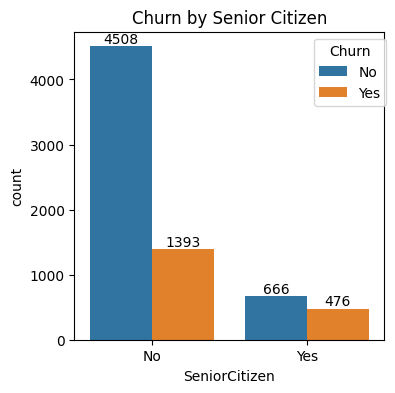

In [21]:
plt.figure(figsize=(4,4))
ax1=sns.countplot(x="SeniorCitizen",data=df, hue="Churn")
for container in ax1.containers:
    ax1.bar_label(container)
plt.title("Churn by Senior Citizen")
plt.legend(title='Churn', loc='upper left', bbox_to_anchor=(0.75,1), ncol=1, fontsize=10)
plt.show

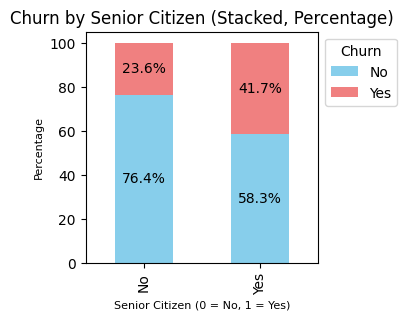

In [22]:
# Calculate the percentage of each 'Churn' category within each 'SeniorCitizen' category
df_percent = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
df_percent['Percentage'] = df_percent.groupby('SeniorCitizen')['Count'].transform(lambda x: x / x.sum() * 100)

# Create a pivot table for better visualization
df_pivot = df_percent.pivot(index='SeniorCitizen', columns='Churn', values='Percentage').fillna(0)

# Plot the stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(3, 3), color=['skyblue', 'lightcoral'])

# Add percentage labels on the stacked bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, p.get_y() + height / 2), 
                    ha='center', va='center', fontsize=10, color='black')

# Set the title of the plot
plt.title("Churn by Senior Citizen (Stacked, Percentage)")
ax.set_xlabel("Senior Citizen (0 = No, 1 = Yes)", fontsize=8)  # <- X-axis title
ax.set_ylabel("Percentage", fontsize=8)
plt.legend(title='Churn', loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=10)

# Show the plot
plt.show()

#Comparatively a greater percentage of people in senior citizen category have churned

<function matplotlib.pyplot.show(close=None, block=None)>

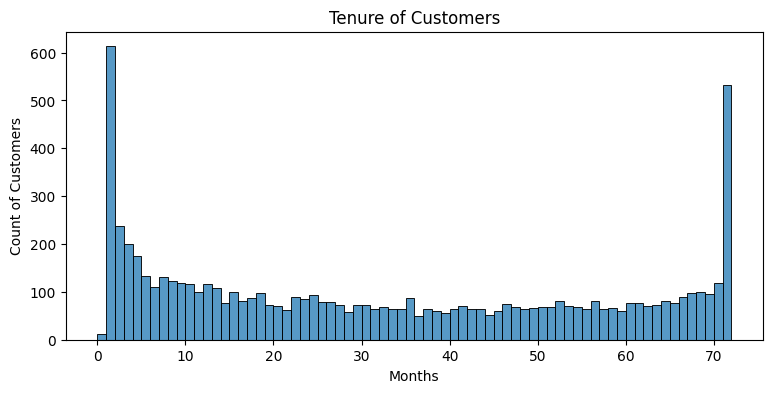

In [23]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df ,bins=72)
plt.title("Tenure of Customers")
plt.xlabel("Months")
plt.ylabel("Count of Customers")
plt.show
#less tenure means they have churned out

<function matplotlib.pyplot.show(close=None, block=None)>

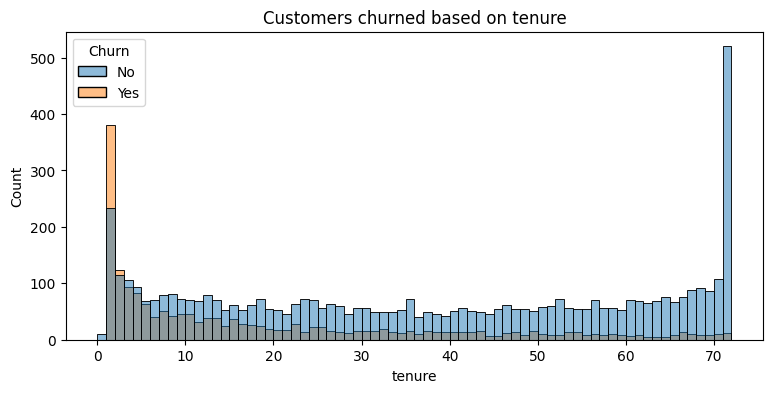

In [24]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df ,bins=72, hue="Churn")
plt.title("Customers churned based on tenure")
plt.show
#less tenure means they have churned out

#people who have used the services for a long time have stayed and people who have used the services for less time (0 to 1 month) have churned

<function matplotlib.pyplot.show(close=None, block=None)>

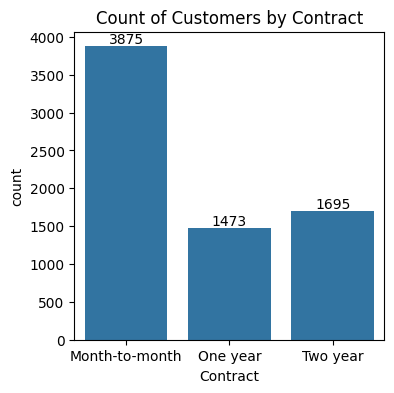

In [25]:
plt.figure(figsize=(4,4))
ax1=sns.countplot(x="Contract",data=df)
for container in ax1.containers:
    ax1.bar_label(container)
plt.title("Count of Customers by Contract")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

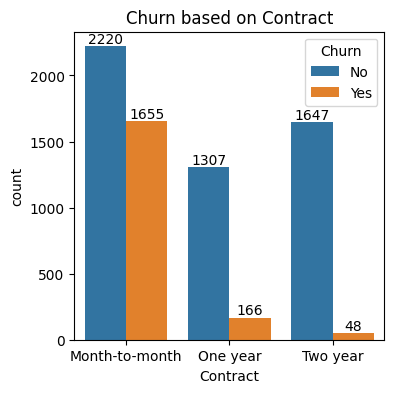

In [26]:
plt.figure(figsize=(4,4))
ax1=sns.countplot(x="Contract",data=df, hue="Churn")
for container in ax1.containers:
    ax1.bar_label(container)
plt.title("Churn based on Contract")
plt.show

#from the above graph we can conclude that people who have a month to month contract are more likely to churn compared to people with 1 or 2 year contracts. Therefore we should focus on attracting the customers to opt for longer duration contracts

In [27]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

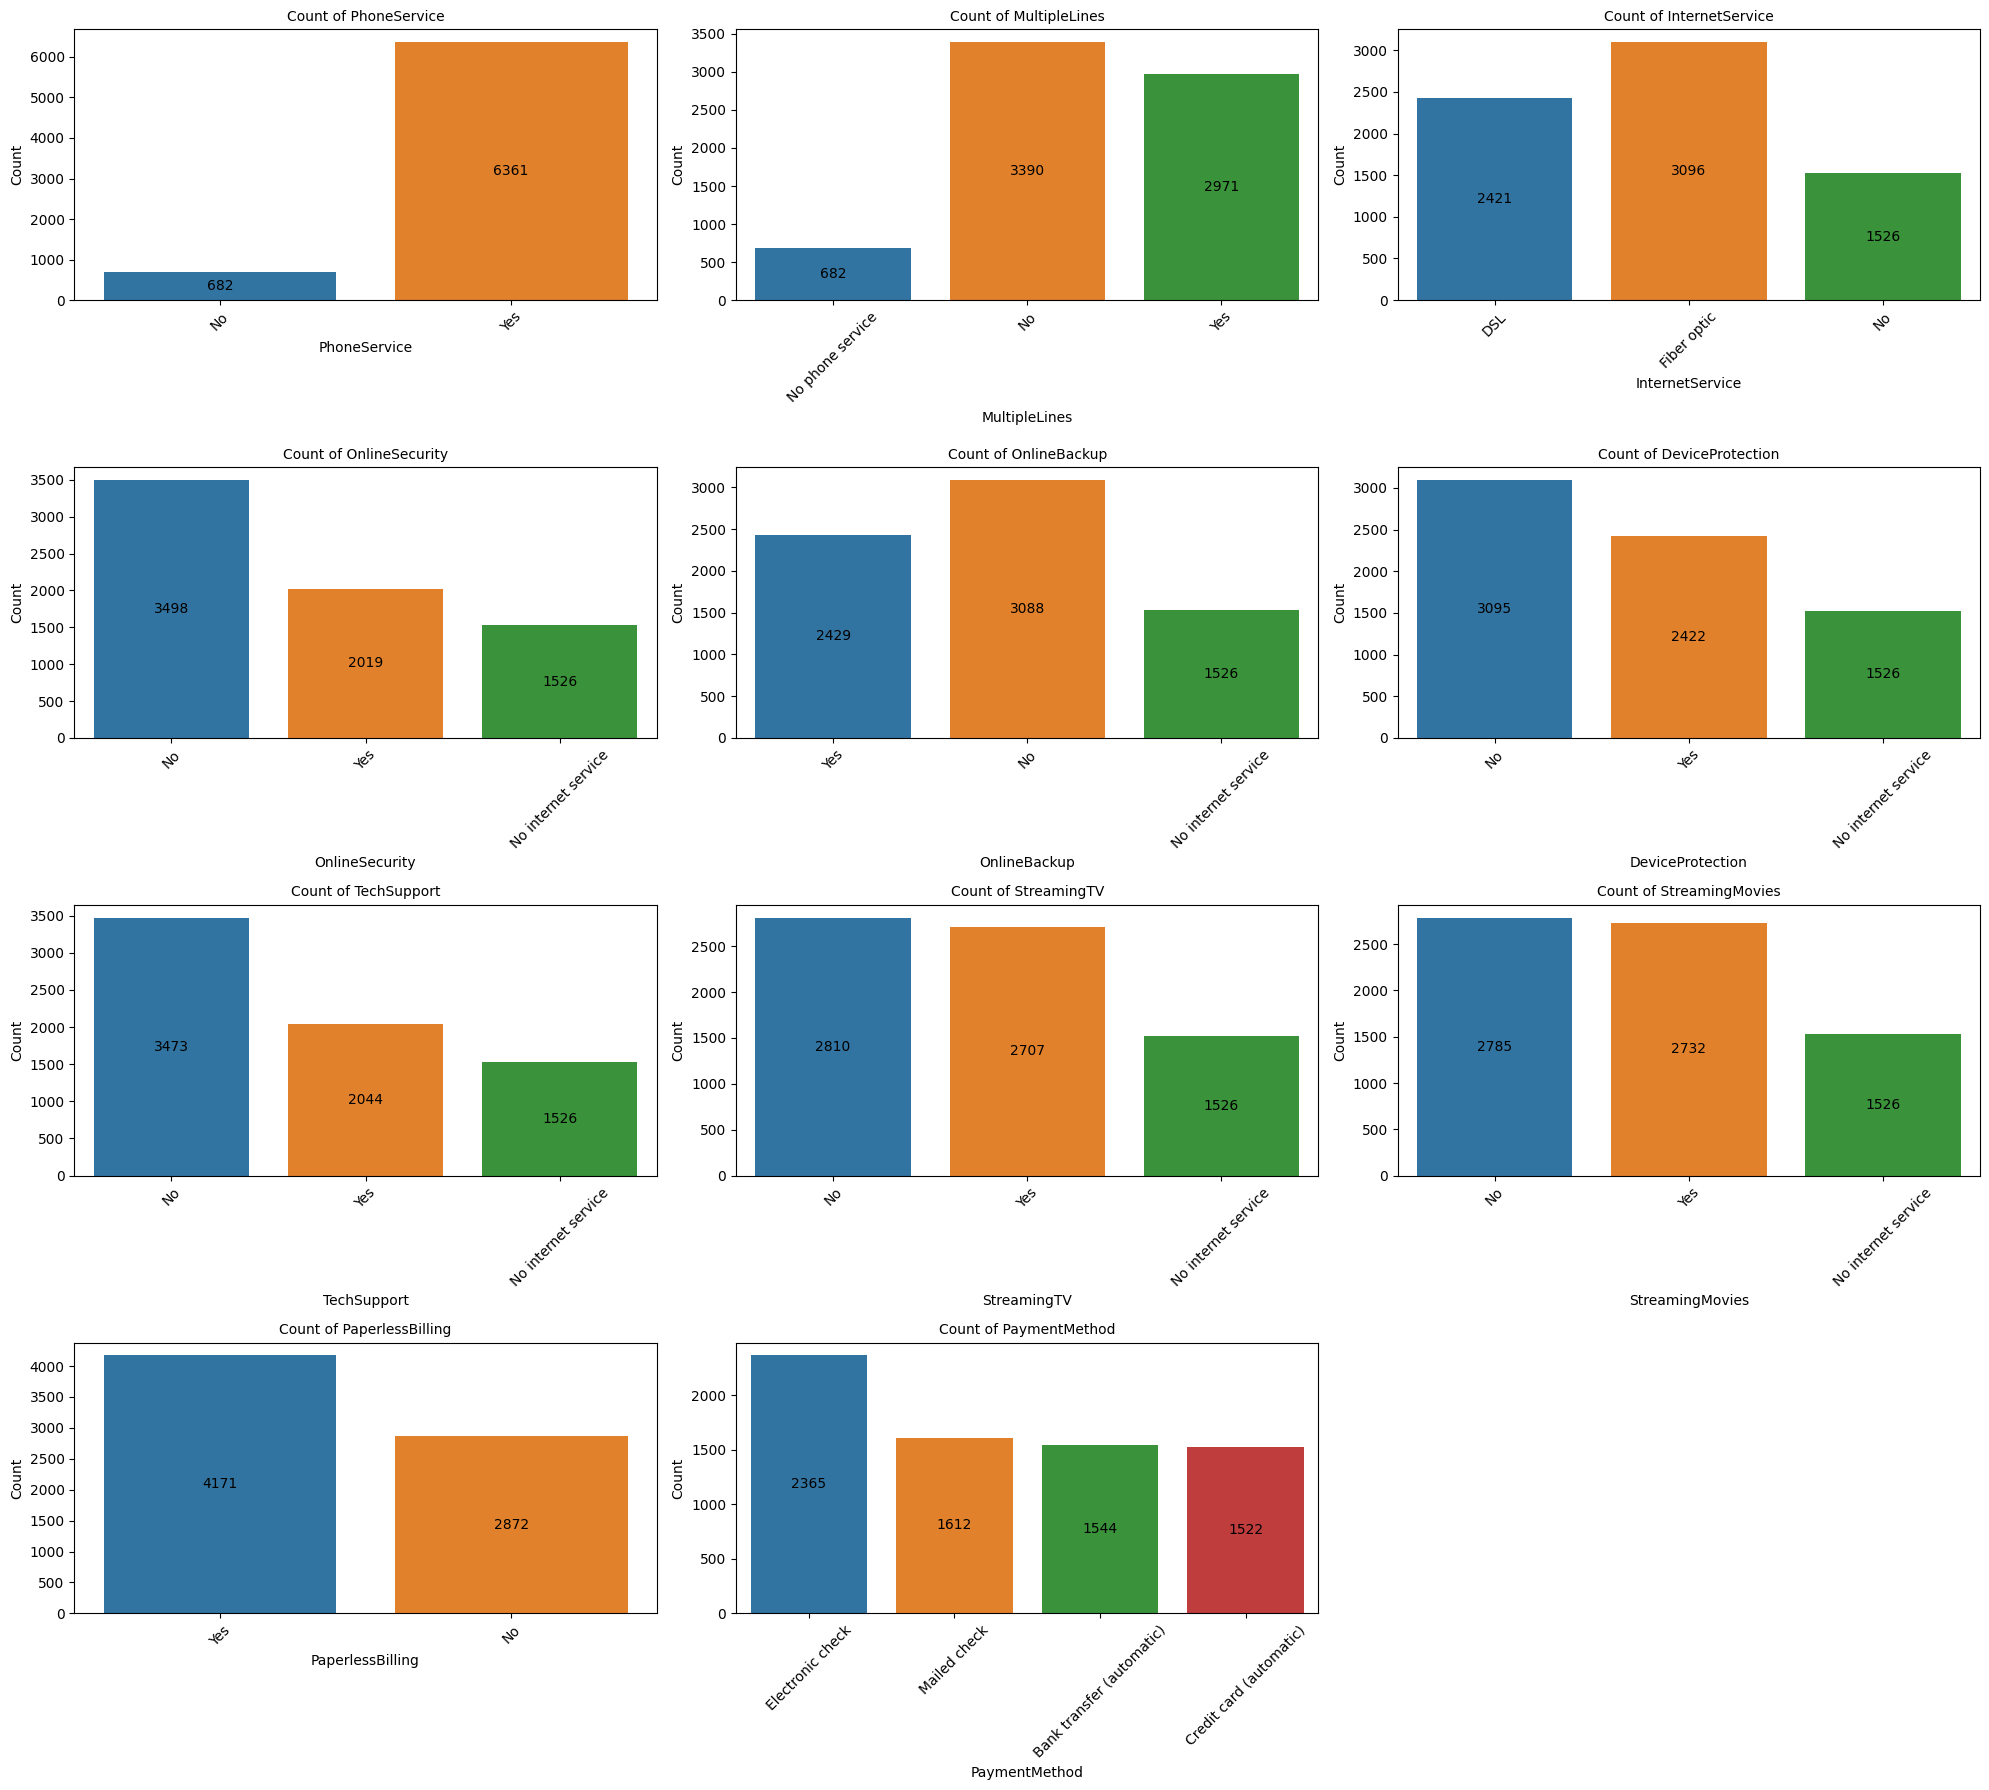

In [28]:
# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod']

# Set up the subplot grid (4 rows x 3 columns)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 18))  # Adjust size as needed
axes = axes.flatten()  # Flatten to use in a loop easily

# Loop through each column and create countplot
for i, col in enumerate(cols):
    ax=sns.countplot(x=col, data=df, hue=col, ax=axes[i])
    axes[i].set_title(f"Count of {col}", fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=10)

    
# Hide the unused subplot (the 12th one)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


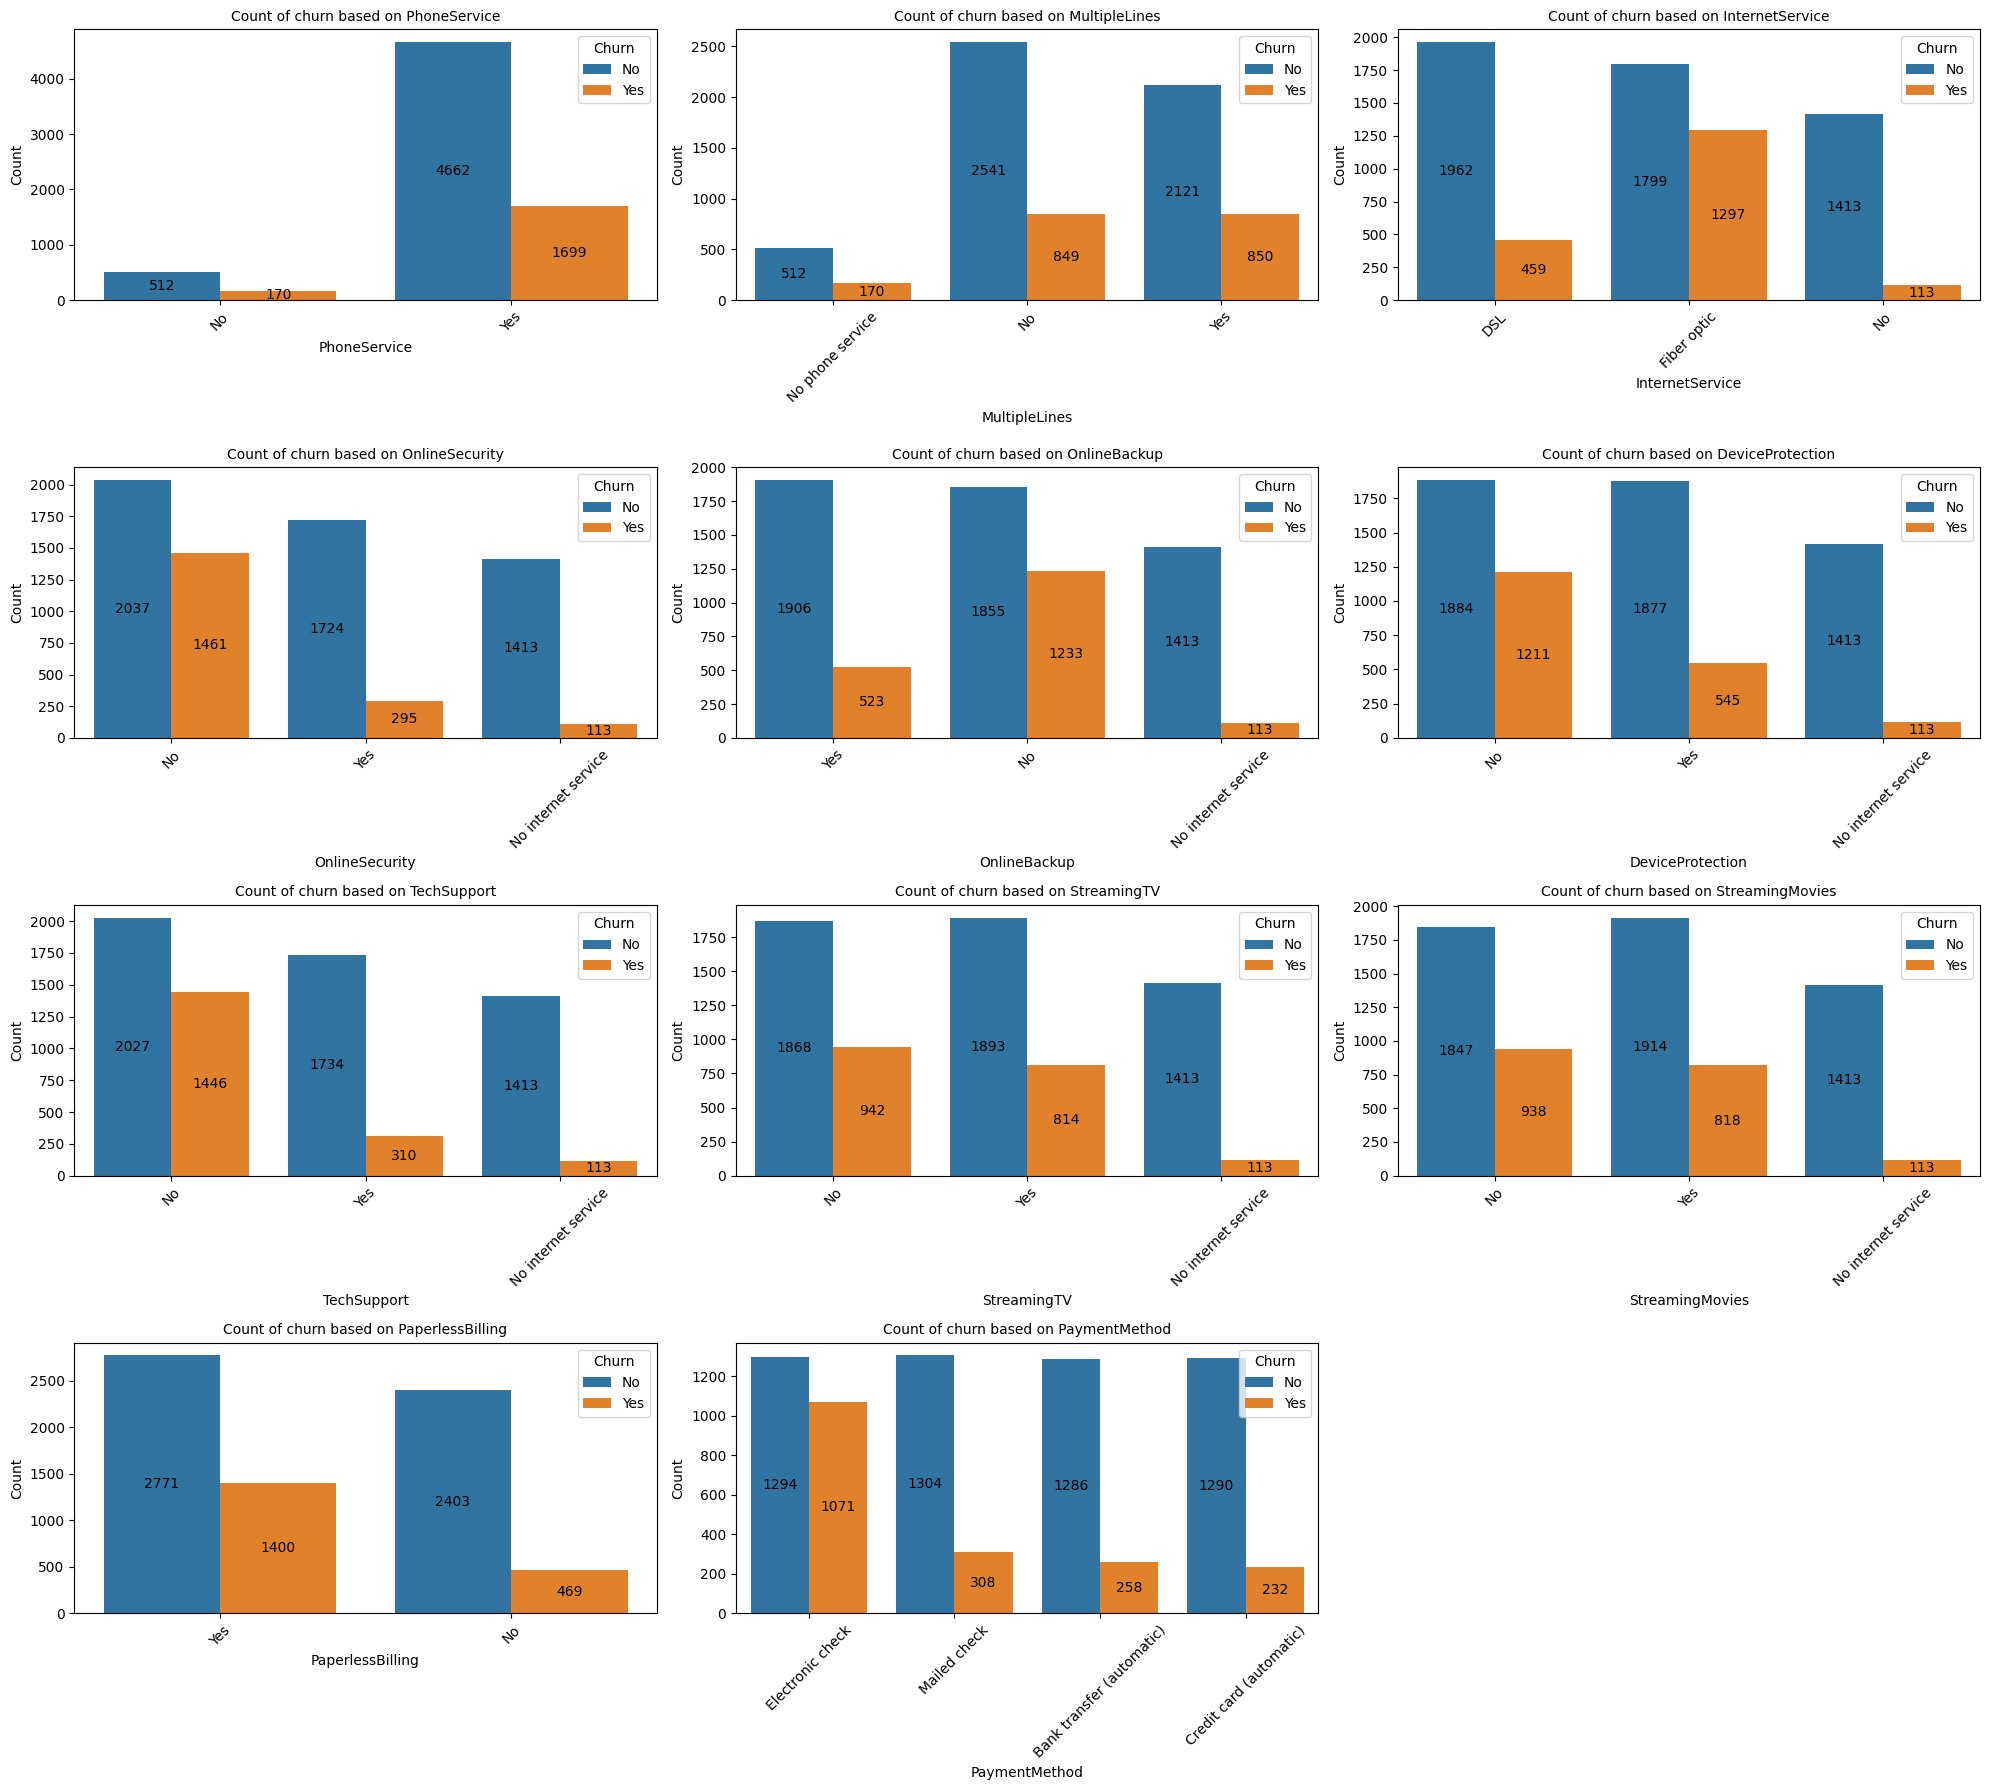

In [29]:
# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies',
        'PaperlessBilling', 'PaymentMethod']

# Set up the subplot grid (4 rows x 3 columns)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 18))  # Adjust size as needed
axes = axes.flatten()  # Flatten to use in a loop easily

# Loop through each column and create countplot
for i, col in enumerate(cols):
    ax=sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f"Count of churn based on {col}", fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=10)

# Hide the unused subplot (the 12th one)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


#The data reveals key factors driving telecom customer churn. Users lacking value-added services (e.g., OnlineSecurity, TechSupport, Streaming) are more likely to churn, highlighting the role of service engagement. Churn is also higher among those using paperless billing and electronic checks, suggesting tech-savvy or cost-conscious users may be less loyal. In contrast, automatic payment methods are linked to lower churn, likely due to convenience. To reduce churn, telecom providers should promote bundled services, enhance digital engagement, and encourage automatic payments.
#people using fibre optic and multiple lines are churning
#people not using online service are churning